In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np

In [62]:
f1 = './프로젝트/연도별 화재 발생 수.xlsx'
d1 = pd.read_excel(f1,index_col=0)
d1.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
건수,570,282,277,197,296,492,623,391,692,496,653,620,349,756,596
면적,"1,381",297,"1,090",72,552,137,418,378,"1,480",894,"3,255","2,920",766,"24,797","4,992"
건당피해,2.4,1.1,3.9,0.4,1.9,0.3,0.7,1.0,2.1,1.8,5.0,4.7,2.2,32.8,8.4
피해재적,92,11,53,2,67,7,32,7,224,101,"5,018","4,864",56,"2,925,560","464,130"
피해액,"3,883","4,451","29,063","2,542","25,020","9,285","20,480","15,721","80,150","48,583","268,910","158,141","36,125","1,346,276","285,429"


In [63]:
f1 = './프로젝트/2009~2023 습도추이.csv'
d1 = pd.read_csv(f1,encoding='euc-kr')
d1 = d1.loc[:179,['일시','평균습도(%rh)']].sort_index(ascending=False).reset_index(drop=True)
d1

,일시,평균습도(%rh)
0,2009-01,59.0
1,2009-02,63.0
2,2009-03,57.0
3,2009-04,57.0
4,2009-05,62.0
...,...,...
175,2023-08,81.0
176,2023-09,81.0
177,2023-10,72.0
178,2023-11,65.0


In [64]:
f2 = './프로젝트/2009~2023 기온추이.csv'
d2 = pd.read_csv(f2,encoding='euc-kr')
d3 = d2.loc[:179,['년월','평균기온(℃)']]
d3['평균습도(%rh)'] = d1['평균습도(%rh)']

In [65]:
d3.corr(numeric_only=True)

,평균기온(℃),평균습도(%rh)
평균기온(℃),1.000000,0.782192
평균습도(%rh),0.782192,1.000000


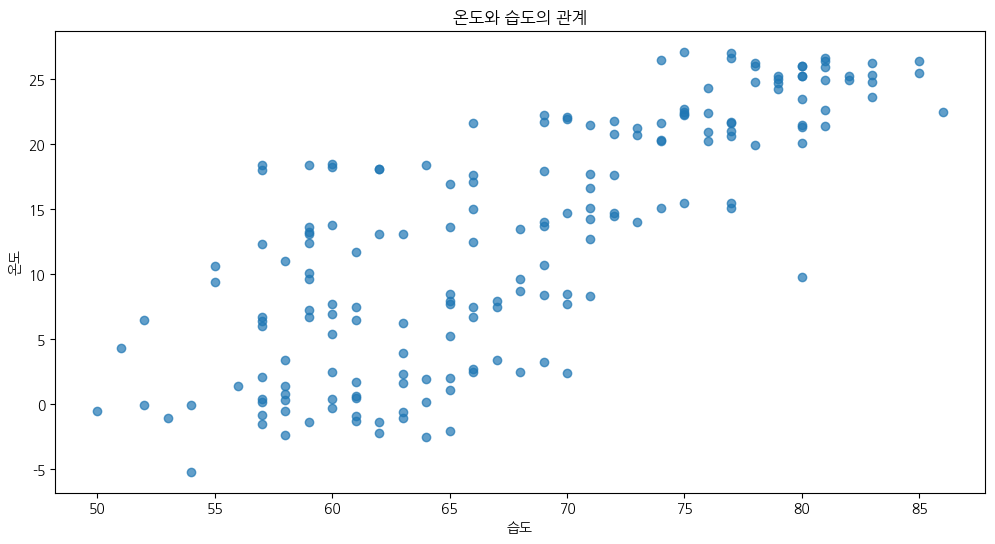

In [101]:
plt.figure(figsize=(12,6), dpi=100)
plt.scatter(d3['평균습도(%rh)'],d3['평균기온(℃)'], alpha=0.7,)
plt.title("온도와 습도의 관계")
plt.xlabel('습도')
plt.ylabel('온도')
plt.show()

In [67]:
d1['년도'] = d1['일시'].str[1:5]
d1['월별'] = d1['일시'].str[-2:]
d1['년도'] = d1['년도'].astype('int16')
d1['월별'] = d1['월별'].astype('int16')
d1 = d1.drop(columns=['일시'])
d14 = d1.groupby('년도').mean()
d15 = d1.loc[((d1['월별'] > 11) | (d1['월별'] < 6)) & (d1['년도'] != 2024)].groupby('년도').mean()

In [68]:
d15 = d15[d15.columns[0]]

In [69]:
d2['년도'] = d2['년월'].str[:4]
d2['월별'] = d2['년월'].str[-2:]
d2['년도'] = d2['년도'].astype('int16')
d2['월별'] = d2['월별'].astype('int16')
d2 = d2.drop(columns=['지점','년월'])
d4 = d2.groupby('년도').mean()
d5 = d2.loc[((d2['월별'] > 11) | (d2['월별'] < 6)) & (d2['년도'] != 2024)].groupby('년도').mean()

In [70]:
d4 = d4['평균기온(℃)']
d5 = d5['평균기온(℃)']

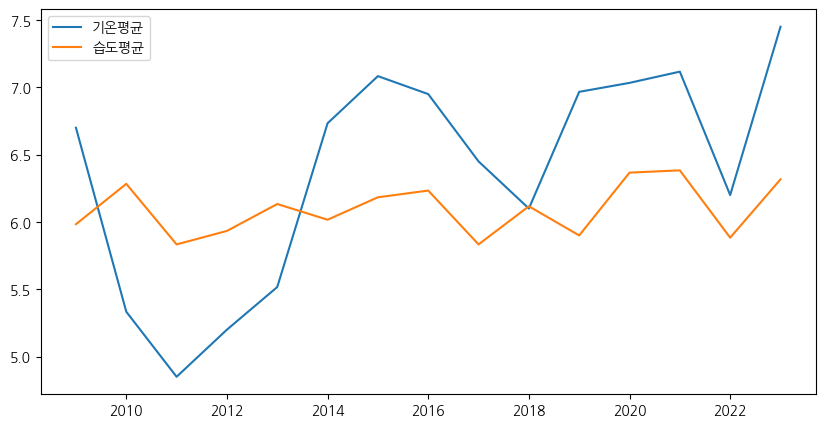

In [71]:
plt.figure(figsize=(10,5))
plt.plot(d5, label='기온평균')
plt.plot(d15/10, label='습도평균')
plt.legend()
plt.show()

In [72]:
f3 = './프로젝트/계절별_산불발생_현황_20240731152544.xlsx'
mfDF = pd.read_excel(f3)
mfDF = mfDF[::2].set_index('계절별')
mfDF_pie_data = mfDF[1:].mean(axis=1,numeric_only=True)
mfDF_pie_data

c:\Users\KDP-38\anaconda3\envs\py39\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


계절별
봄(3~5월)      280.066667
여름(6~8월)      39.333333
가을(9~11월)     42.733333
겨울(12~2월)    123.866667
dtype: float64

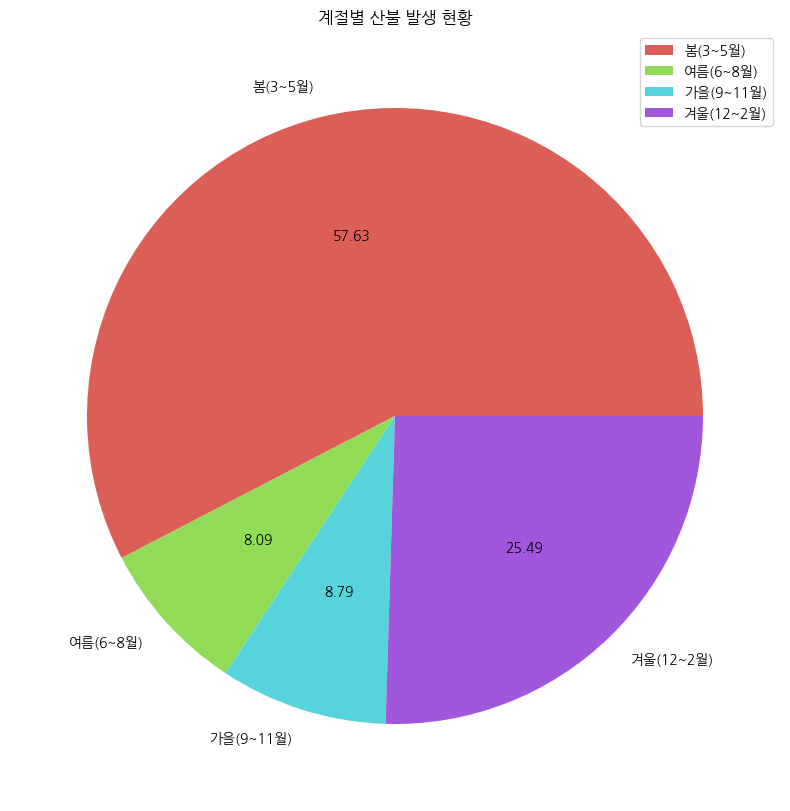

In [103]:
colors = sns.color_palette('hls',len(mfDF_pie_data.index))
plt.figure(figsize=(10,10))
plt.pie(mfDF_pie_data, autopct='%.2f',colors=colors,labels=mfDF_pie_data.index)
plt.title('계절별 산불 발생 현황')
plt.legend()
plt.show()

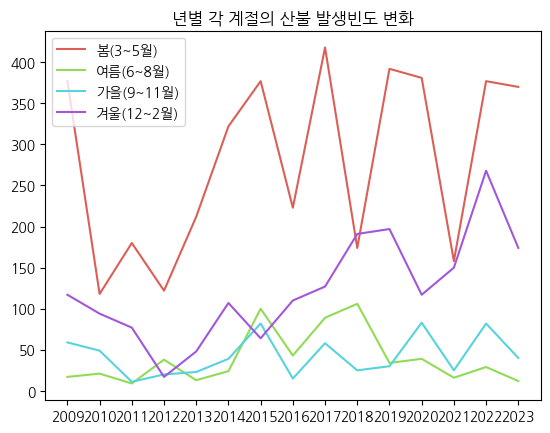

In [74]:
mfDF_plot_data = mfDF.drop(columns='기간별')[1:]
mfDF_plot_dict = mfDF_plot_data.T.to_dict()
colors = sns.color_palette('hls',len(mfDF_plot_data.index))
idx2 = 0
for idx, val in mfDF_plot_dict.items():
    x = list(val.keys())
    y = list(val.values())
    plt.plot(x,y,'-',color=colors[idx2],label=idx)
    idx2+=1 
plt.title('년별 각 계절의 산불 발생빈도 변화')
plt.legend()
plt.show()

In [75]:
mfw = {}
mfDF_spring = mfDF_plot_dict['봄(3~5월)']
for key, val in mfDF_plot_dict['겨울(12~2월)'].items():
    mfw[int(key)] = val + mfDF_spring[key]

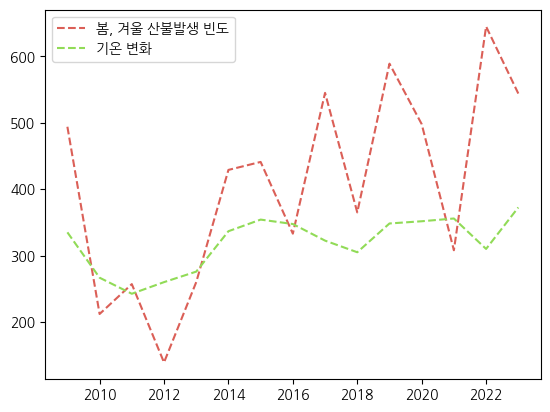

년도
2009    6.700000
2010    5.333333
2011    4.850000
2012    5.200000
2013    5.516667
2014    6.733333
2015    7.083333
2016    6.950000
2017    6.450000
2018    6.100000
2019    6.966667
2020    7.033333
2021    7.116667
2022    6.200000
2023    7.450000
Name: 평균기온(℃), dtype: float64

In [105]:
d52 = (d5*50).to_dict()
plt.plot(list(mfw.keys()),list(mfw.values()),'--',color=colors[0],label='봄, 겨울 산불발생 빈도')
plt.plot(list(d52.keys()),list(d52.values()),'--',color=colors[1],label='기온 변화')
plt.legend()
plt.show()
d5

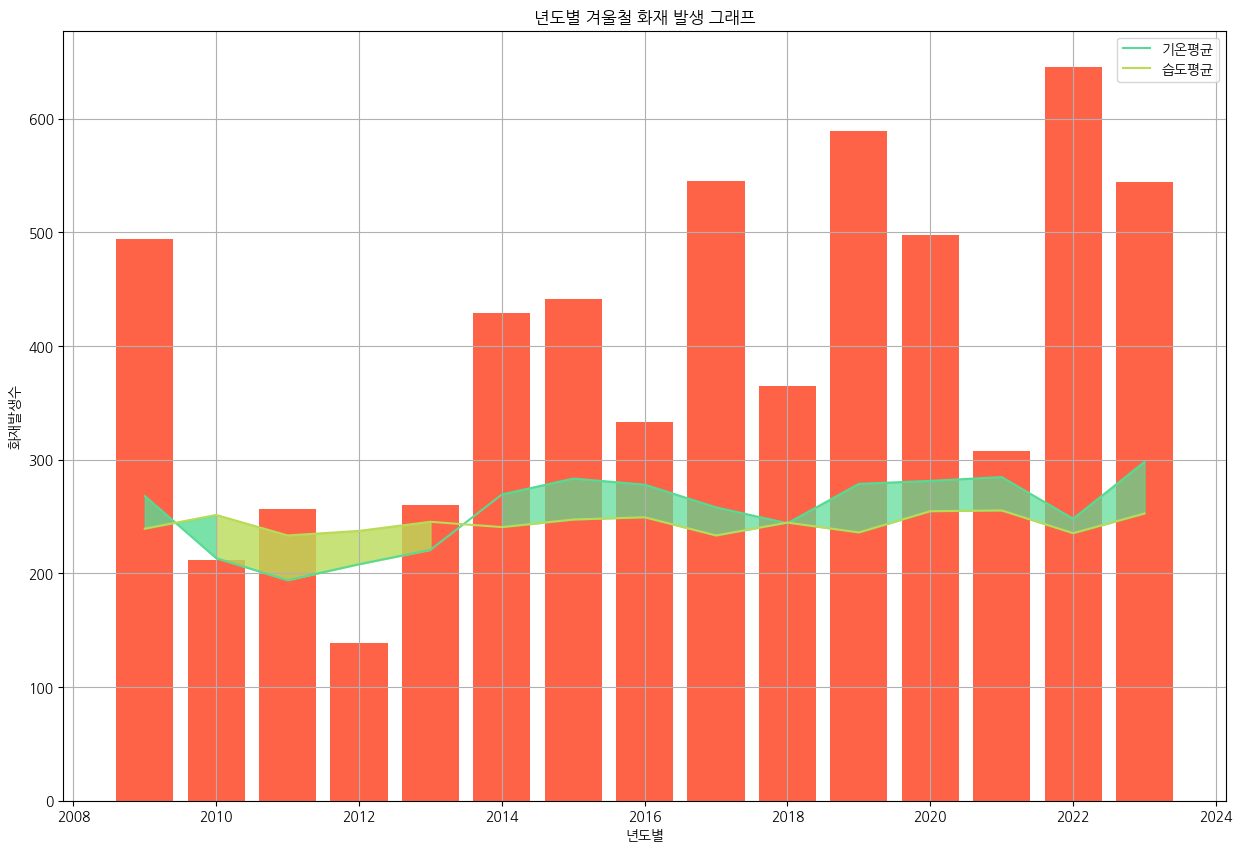

In [139]:
plt.figure(figsize=(15,10))
plt.bar(mfw.keys(), mfw.values(), color='tomato')
plt.title('년도별 겨울철 화재 발생 그래프')
plt.plot(d5*40, label='기온평균',color=colors[2])
plt.plot(d15*4, label='습도평균', color=colors[1])
plt.fill_between(d5.index[:2], d5.values[:2]*40, d15.values[:2]*4, color = colors[2], alpha = 0.8)
plt.fill_between(d5.index[1:5], d5.values[1:5]*40, d15.values[1:5]*4, color = colors[1], alpha = 0.8)
plt.fill_between(d5.index[5:], d5.values[5:]*40, d15.values[5:]*4, color = colors[2], alpha = 0.7)
plt.ylabel('화재발생수')
plt.xlabel('년도별')
plt.grid()
plt.legend()
plt.show()

In [78]:
f4 = './프로젝트/월별_피해면적19972016_20240731164326.xlsx'
mfdmgDF = pd.read_excel(f4)

c:\Users\KDP-38\anaconda3\envs\py39\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [79]:
mfdmgDF = mfdmgDF[2::2].set_index('월별')
mfdmgDF = mfdmgDF.drop(columns='기간별')
mfdmgDF = mfdmgDF.replace('-','0.00')

In [80]:
mfdmgDF = mfdmgDF.astype('float64')

In [81]:
mfdmgDF_pie_data = mfdmgDF.T.mean()

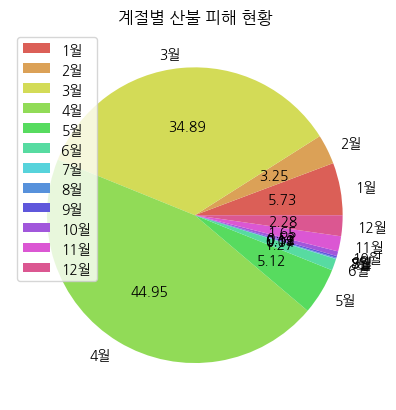

In [82]:
colors = sns.color_palette('hls',len(mfdmgDF_pie_data.index))
plt.pie(mfdmgDF_pie_data, autopct='%.2f',colors=colors,labels=mfdmgDF_pie_data.index)
plt.title('계절별 산불 피해 현황')
plt.legend()
plt.show()

In [83]:
mfcutDF = (mfDF_plot_data.loc[['겨울(12~2월)','봄(3~5월)'],mfDF_plot_data.columns[:8]]*8).sum().to_dict()
mfcutDF

{'2009': 3952,
 '2010': 1696,
 '2011': 2056,
 '2012': 1112,
 '2013': 2080,
 '2014': 3432,
 '2015': 3528,
 '2016': 2664}

In [84]:
f5 = './프로젝트/산불피해_현황_20240731172931.xlsx'
mfdmg_yearDF = pd.read_excel(f5)
mfdmg_yearDF_data = pd.DataFrame(index=range(2009,2024), columns=['건수','면적','피해액'])
mfdmg_yearDF2 = mfdmg_yearDF.copy()
# mfdmg_yearDF.iloc[0] + 
mfdmg_yearDF2.columns = mfdmg_yearDF.columns.str[:4] + ' ' +mfdmg_yearDF.iloc[1]
mfdmg_yearDF2 = mfdmg_yearDF2.drop(index=[0,1], columns=mfdmg_yearDF2.columns[0])
mfdmg_yearDF2 = mfdmg_yearDF2.to_dict()
for idx, val in mfdmg_yearDF2.items():
    if '건수' in idx:
        mfdmg_yearDF_data.loc[int(idx[:4]),'건수']=val[2]
    if '면적' in idx:
        mfdmg_yearDF_data.loc[int(idx[:4]),'면적']=val[2]
    if '피해액' in idx:
        mfdmg_yearDF_data.loc[int(idx[:4]),'피해액']=val[2]
mfdmg_yearDF_data

c:\Users\KDP-38\anaconda3\envs\py39\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\KDP-38\AppData\Local\Temp\ipykernel_8556\3319356428.py:8: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  mfdmg_yearDF2 = mfdmg_yearDF2.to_dict()


,건수,면적,피해액
2009,570,1380.58,3882701
2010,282,296.84,4450914
2011,277,1089.53,29062872
2012,197,71.91,2541534
2013,296,551.78,25019788
2014,492,136.92,9284595
2015,623,418.07,20480226
2016,391,377.65,15720978
2017,692,1479.65,80149972
2018,496,894.07,48583214


In [85]:
mfdmg_yearDF_data = mfdmg_yearDF_data.to_dict()

In [86]:
mfdmg_yearDF_data['면적'][2009]

1380.58

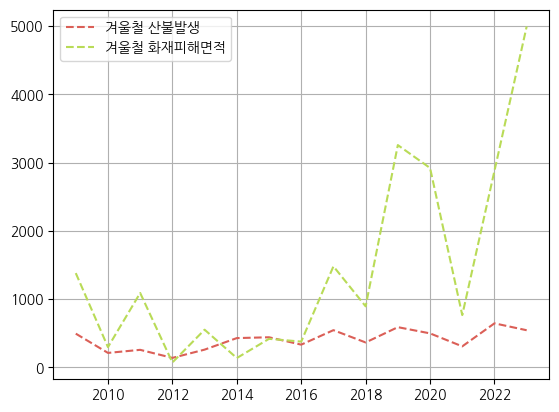

In [138]:
colors = sns.color_palette('hls',5)
ci = 1
mfdma = mfdmg_yearDF_data['면적']
# for idx, val in mfdmg_yearDF_data.items():
#     plt.plot(list(val.keys()),list(val.values()),'--',color=colors[ci],label=idx)
#     ci+=1
plt.plot(list(mfw.keys()),list(mfw.values()),'--',color=colors[0],label='겨울철 산불발생')
plt.plot(list(mfdma.keys()),list(mfdma.values()),'--',color=colors[1],label='겨울철 화재피해면적')
plt.legend()
plt.grid()
plt.show()

In [95]:
mfdma.pop(2022)

24797.16

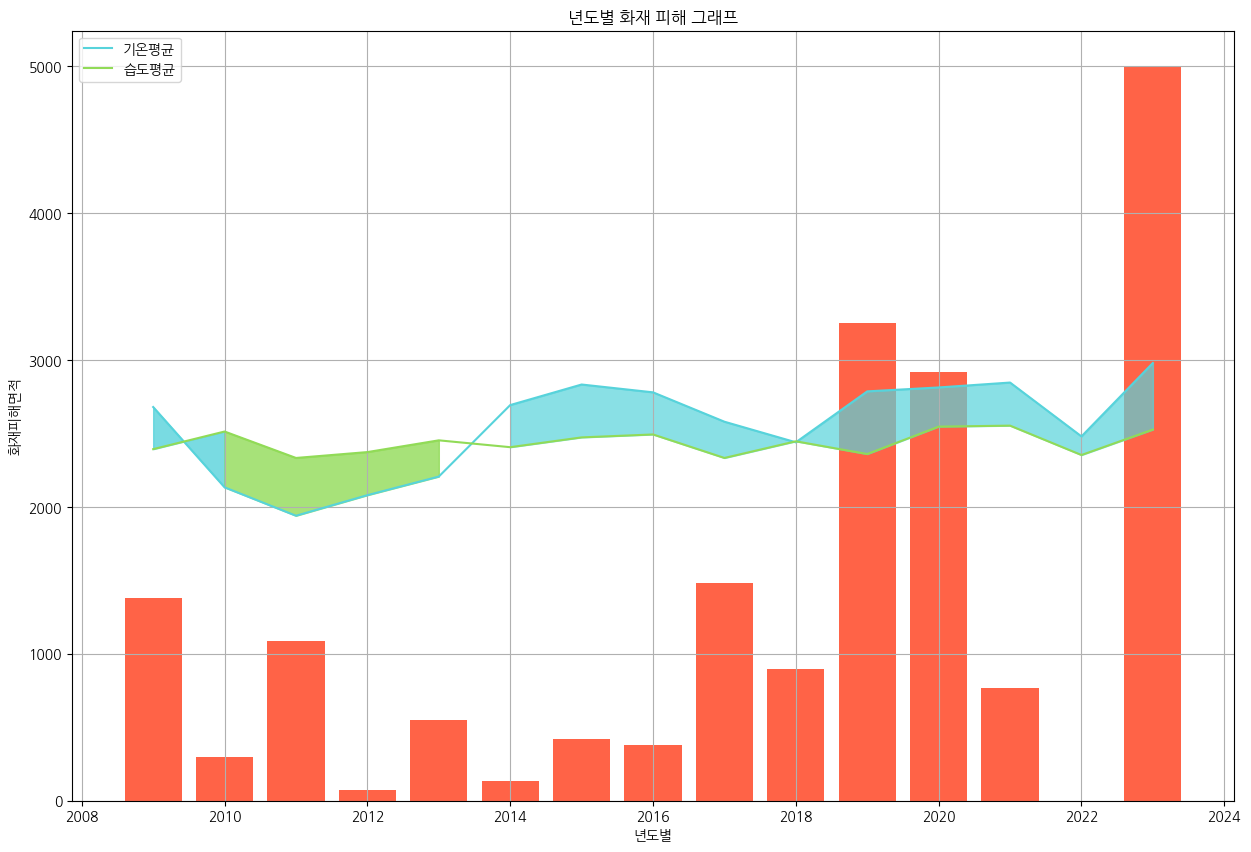

In [137]:
plt.figure(figsize=(15,10))
plt.bar(mfdma.keys(), mfdma.values(), color='tomato')
plt.title('년도별 화재 피해 그래프')
plt.plot(d5*400, label='기온평균',color=colors[2])
plt.plot(d15*40, label='습도평균', color=colors[1])
plt.fill_between(d5.index[:2], d5.values[:2]*400, d15.values[:2]*40, color = colors[2], alpha = 0.8)
plt.fill_between(d5.index[1:5], d5.values[1:5]*400, d15.values[1:5]*40, color = colors[1], alpha = 0.8)
plt.fill_between(d5.index[5:], d5.values[5:]*400, d15.values[5:]*40, color = colors[2], alpha = 0.7)
plt.ylabel('화재피해면적')
plt.xlabel('년도별')
plt.legend()
plt.grid()
plt.show()

In [89]:
d1[(d1['년도'] == 2022) & (d1['월별'] < 4)]

,평균습도(%rh),년도,월별
156,57.0,2022,1
157,52.0,2022,2
158,65.0,2022,3


In [90]:
burn2002 = d1[d1['월별'] < 4]
burn2002

,평균습도(%rh),년도,월별
0,59.0,2009,1
1,63.0,2009,2
2,57.0,2009,3
12,62.0,2010,1
13,65.0,2010,2
14,65.0,2010,3
24,54.0,2011,1
25,63.0,2011,2
26,51.0,2011,3
36,57.0,2012,1


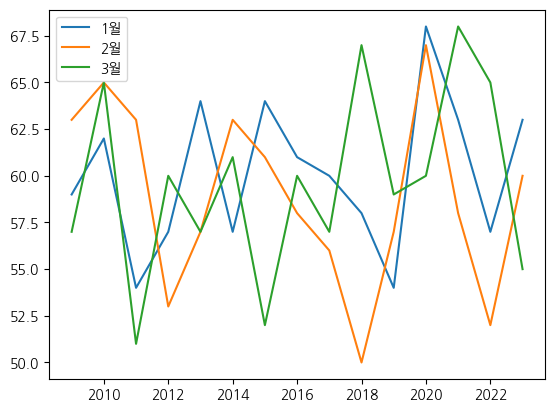

In [91]:
for i in range(1,4) :
    lists = burn2002[burn2002['월별'] == i][['년도','평균습도(%rh)']]
    lists = lists.set_index('년도')
    plt.plot(lists,label=f'{i}월')
plt.legend()
plt.show()

In [92]:
f6 = './프로젝트/강원특별자치도_제설재 사용량 현황_20221231.csv'
gangwonsnowDF = pd.read_csv(f6,encoding='euc-kr')
gangwonsnowDF = gangwonsnowDF.groupby('사용연도').sum()[['구매량','사용량','재고량']]

In [93]:
gangwon_snow_dict = gangwonsnowDF.to_dict()
snowidx = gangwonsnowDF.index.to_list()

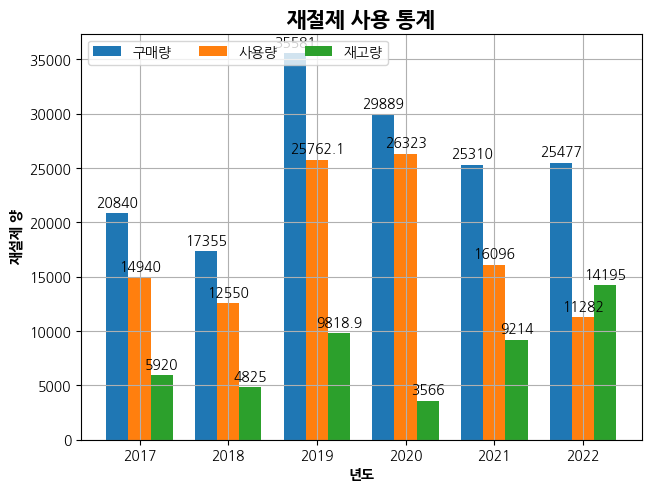

In [136]:
x = np.arange(len(gangwonsnowDF))

width = 0.25
multiplier = 0 
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in gangwon_snow_dict.items():
    measurement = measurement.values()
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('재설제 양', fontweight='bold')
ax.set_xlabel('년도', fontweight='bold')
ax.set_title('재절제 사용 통계', fontweight='bold', fontsize=15)
ax.set_xticks(x + width, snowidx)
ax.legend(loc='upper left', ncols=3)
plt.grid()

plt.show()